# Assignment 3

### Teaching Assistants:
- Ecem Lago: ecem.lago@radboudumc.nl
- Thomas de Bel: Thomas.deBel@radboudumc.nl

Please submit your notebook via grand-challenge.org: https://ismi-nodules.grand-challenge.org/

This notebook requires tensorflow and keras installed, please make sure you installed the required packages: https://ismi-nodules.grand-challenge.org/Resources/

Submit a notebook **WITH ALL CELLS EXECUTED!!!**

* Groups: You should work in pairs or alone. Working in groups of 2-3 is preferable.
* Deadline for this assignment: 
 * Monday, February 18th until 23:59h.
 * 5 points (maximum grade = 100 points) penalization per day after deadline.
* Submit your **fully executed** notebook to the grand-challenge.org platform.
* The file name of the notebook you submit must be ```NameSurname1_NameSurname2_NameSurname3.ipynb```
* The grades will be available before February 25th (tentative)


## Introduction 

<img src="./figures/lungrads.png" alt="LungRADS guidelines" align="right" width="500">

A pulmonary nodule is a small round or oval-shaped growth in the lung. It may also be called a “spot on the lung” or a “coin lesion.” Pulmonary *nodules* are smaller than three centimeters (around 1.2 inches) in diameter. If the growth is larger than that, it is called a pulmonary *mass* and is more likely to represent a cancer than a nodule [http://my.clevelandclinic.org/health/articles/pulmonary-nodules].

Nodules can be detected in chest CT images as objects with some kind of rounded shape (even though it is not always the case), which have an intensity that is higher (brighter) than the parenchyma tissue in the lungs.

If a nodule is detected, guidelines have to be followed to decide what is the best management for the patient.
For this purpose, the LungRADS guidelines have been released [https://www.acr.org/Clinical-Resources/Reporting-and-Data-Systems/Lung-Rads], which describe the type of follow-up analysis based on the type and size of detected nodules.
The main categories of nodules considered in LungRADS are 5:
* solid nodule
* ground-glass nodules (also called GGN, non-solid nodules)
* semi-solid nodules (also called part-solid nodules)
* calcified nodules
* spiculated nodules

<img src="./figures/nodules.png" alt="Nodules" align="right" width="500">

**Solid** nodules are characterized by an homogeneous texture, a well-defined shape and an intensity above -450
Housfield Units (HU) on CT. **Spiculated** nodules appear as solid lesions with characteristics spikes at the border, often considered as an indicator of malignancy. **Non-Solid** nodules (also called ground-glass opacities) have an intensity on CT lower than solid nodules (above -750 HU). **Part-Solid** nodules (also called semi-solid nodules) contain both a non-solid and a solid part, the latter normally referred to as the solid core. Compared with solid nodules, non-solid and part-solid nodules have a higher frequency of being malignant lesions. Finally, **calcified** nodules are characterized by a high intensity and a well-defined rounded shape on CT. If a nodule is completely calcified, it is a benign lesion.

The figure on the right shows the table used in LungRADS, which you can also find in ```./literature/AssessmentCategories.pdf```.
As you can see, the five categories are mentioned in the table, as well as nodule size.
While nodule size is something that can be easily measured using a segmentation software, the discrimination of nodule types is not trivial. The figure on the right shows examples of pulmonary nodules at different scales. For each nodule, a 2D view in the axial, coronal and sagittal view is shown. 

In this assignment, we are going to develop a system based on machine learning to automatically classify pulmonary nodules detected in chest CT scans. For this purpose, we will use data from the publicly available dataset LIDC-IDRI (https://wiki.cancerimagingarchive.net/display/Public/LIDC-IDRI). In LIDC-IDRI, nodules have been annotated and labeled by four radiologists. Based on their annotations, we extracted a subset of nodules that will be used in this assignment for training and for test purposes.

The idea of this assignment is to develop a **multi-class classification system** using machine learning, in particular using **neural networks**. The goal is to achieve the best classification accuracy on the test set, which contains 50 nodules for each class. For each nodule in both the training and test set, we provide both raw data (cubes of 40x40x40 mm containing nodules) and a representation of nodules, meaning a feature vector of 256 values (more details are provided later).
The purpose of this assignment is two-fold:

1. Use the features provided to develop a system based on neural networks to classify pulmonary nodule type
2. Modify the architecture and the hyper-parameters of the neural networks and investigate how performance change
3. Design and extract new features from raw data, and use them in your classification framework

## Data 

We will use data from the publicly available LIDC-IDRI dataset (https://wiki.cancerimagingarchive.net/display/Public/LIDC-IDRI).
From this dataset, we selected nodules to use in this assignment. In particular, we made a training set and a test set.
In both sets, five nodule types are included, namely:
* Solid
* Non-solid (ground-glass)
* Part-solid (semi-solid)
* Calcified
* Solid spiculated

**Training set**. The training set **contains a distribution of nodules types that resembles what is typically found in radiology: most of the nodules are solid**. As a consequence, you will notice that the distributions of classes are skewed.

**Validation set**.
We don't provide a validation set. As part of the assignment, you will be asked to build a validation set yourself.

**Test set**.
The test set contains a **balanced** distribution of nodules, meaning that we randomly selected the same amount of nodules per class.

### Data details
We provide training and test data in two formats: (a) a **dataset** format and (b) a **raw data** format.

#### Dataset format
The first format is a typical **dataset** format, a matrix, where each row is a sample and each column is a feature. In this
dataset, we provide 256 features per nodule. At this stage you don't need to care too much about the source of these features (we will tell you more about that later), just consider that these features are somehow descriptive of pulmonary nodules.
The files in dataset format are ```training_set.npz``` and ```test_set.npz```.
In the first part of this assignment, you will be asked to train and validate neural networks using the features provided.
The training dataset contains data in the field ```['x']``` and labels in the field ```['y']```, while the test set only contains data in the field ```['x']```. The test set also contains a fiels ```['nodule_ids']```, which has unique nodule identifiers that will be used to build the file to submit to *grand-challenge.org*.
The nodule ID has the following format:

* ```seriesuid_worldx_worldy_worldz_diameter```

where ```seriesuid``` is the code that identifies the scan, ```worldx```, ```y``` and ```z``` indicate the position of the nodule in the scan in world coordinates, and ```diameter``` indicates the diameter of the nodule in *mm*. The position is not really important in this assignment, since we extracted the nodules from the scans for you, but in case you want to trace back these nodules, you know where you can find them in the LIDC-IDRI scans. The diameter may be useful in the last part of this assignment.

#### Raw data format
We also provide raw nodule data, because in the third part of this assignment, you will be asked to train and validate neural networks using raw nodule data. In this part of the assignment, raw data will be avaialble, meaning that you will have the chance of processing data as you like, directly feeding data to the neural network, or extracting additional features, etc.
Since pulmonary nodules are extracted from CT scans, raw data is 3D data.
Therefore, what we provide is a *cube* for each nodules with size 64x64x64 px, which corresponds to 40x40x40*mm* (we resampled the scans before nodule extraction).

In the training set, raw nodule data is organized in folders grouped per nodule type. We think that this may be convenient for you. Cubes are stored as ```npz``` files, and HU intensities are stored in the field ```['data']```, while the class label is stored in the field ```['label']``` for each nodule. Each file is named using the ```nodule_id```, where we also append the actual nodule label at the end of the file name.

In the test set, you fill find a similar structure as for the training set, but labels are not provided and nodules are not organized in folders.

# Tasks
The tasks for this assignment are the following.


### 1. Train a basic neural network with given nodule-related features (60 points)
We have computed features of nodules that you can use for this first part of the assignment. The feature vector contains 256 features per sample, you can find them in ```LIDC-IDRI/training/training_set.npz``` and ```LIDC-IDRI/test/test_set.npz```.
* Report results using the shallow neural networks architecture proposed in this first part of the assignment.

### 2. Improve the neural network by adding more layers (20 points)
For the second part of the assignment you need to improve the performance of your network. You can do this, for example, by adding extra layers, or by fine-tuning the hyper-parameters.
* Report results using neural networks, experiment with several architectures, hyper-parameters, try with different learning rates, etc.

### 3. Train a neural network with raw nodule data (20 points)
For the thrid part of the assignment you will have to deal with raw data, you can find them in the directory ```nodules``` for training and test respectively.
* Report results using neural networks, experiment with several architectures, hyper-parameters
* Design and extract your own features from the raw data provided

# Task 1: Train a neural network with given nodule-related features

In [4]:
#import libraries

import numpy as np
import os
import sklearn
import sklearn.neighbors
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import itertools
import time
from tqdm import tqdm
import random
!pip install tensorflow
import tensorflow as tf
!pip install keras
import keras    

    100% |████████████████████████████████| 317kB 5.6MB/s ta 0:00:01


Using TensorFlow backend.


## Download the dataset on your computer

In [5]:
import requests
from tqdm import tqdm_notebook
import zipfile

link = 'https://surfdrive.surf.nl/files/index.php/s/IglByZUcav5BTtv/download'
file_name = "LIDC-IDRI.zip"
with open(file_name, "wb") as f:
        response = requests.get(link, stream=True)
        total_length = response.headers.get('content-length')
        if total_length is None: # no content length header
            f.write(response.content)
        else:
            dl = 0
            total_length = int(total_length)
            for data in tqdm_notebook(response.iter_content(chunk_size=4096), desc='Downloading data'):
                dl += len(data)
                f.write(data)
with zipfile.ZipFile(file_name,"r") as zip_ref:
    zip_ref.extractall("./")
os.remove('./LIDC-IDRI.zip')
data_dir = './LIDC-IDRI'
network_dir = './'

In [6]:
# labels for the five classes in this classification problem.
# These are the same names used in folders for raw training data
noduleTypes = ["Solid", "Calcified", "PartSolid", "GroundGlassOpacity", "SolidSpiculated"]
n_classes = len(noduleTypes)# len returns the number of element in a list
print('Classification problem with {} classes'.format(n_classes))

Classification problem with 5 classes


In [7]:
# convenience function
def get_file_list(path,ext='',queue=''):
    if ext != '': return [os.path.join(path,f) for f in os.listdir(path) if f.endswith(''+queue+'.'+ext+'')],  [f for f in os.listdir(path) if f.endswith(''+queue+'.'+ext+'')]    
    else: return [os.path.join(path,f) for f in os.listdir(path)]

### Get to know your data!
The data you have now is stored in cubes per nodule, but originally belongs <img src="figures/orthogonalviews.jpg" align='right'> to a Chest CT scan. We have three orthogonal orientations: axial, coronal and sagittal orientations. Each cube is $64\times64\times64$ px (40x40x40 *mm*).

Implement a function that, given a cube containing nodule raw 3D data, returns three orthogonal 2D patches, corresponding to the *axial*, *coronal* and *sagittal* view. Use the figure on the right in this notebook as reference.

In [8]:
# convenience function that returns the axial, coronal and sagitaal view given a cube (in numpy format) containing a nodule

# CHECK/ask this. The method is correct I think, but I have no idea if I am right what exactly the axial, coronal, and sagittal views are
# since the plots all look like crap to me.

def get_ortogonal_patches(x):
    
    dims = x.shape # Get shape of X
    
    ### modify the next three lines of code to extract three views of a nodule ###
    # dims are  (64,64,64)
    # we assume: x is going from left to right
    # Y is going from front to back
    # Z is going from up to down
    
    # given that python and the image both preserve the mathematical (x,y,z) convention for planes:
    # axial axis means that a certain z value is fixed, and (x,y) then spans a 2d plane
    # coronal plane means a fixed value for y (back and forth), so y is fixed and x,z span 2d image (plane)
    # sagittal means fixed x (no left to right), so x is fixed and y,z span 2d image
    # We simply take the center values for the fixed points in each slice, given by floor(64 / 2)
    axial = x[:, :, dims[0] // 2].squeeze()
    coronal = x[:,dims[0] // 2 , :].squeeze()
    sagittal= x[dims[0] // 2,: ,: ].squeeze()
    
    return axial, coronal, sagittal

Now visualize some nodules in the training set in axial, coronal and sagittal orientations using the function that you have implemented.

(64, 64) axial shape


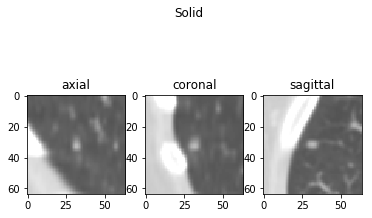

(64, 64) axial shape


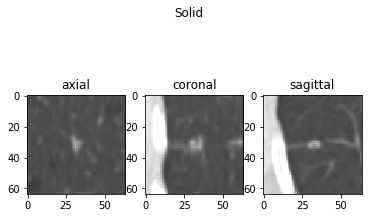

(64, 64) axial shape


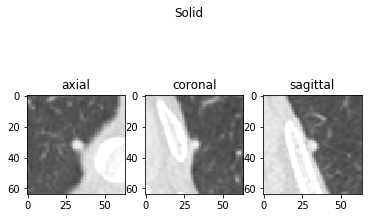

(64, 64) axial shape


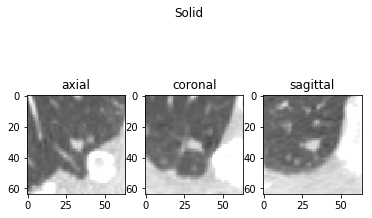

(64, 64) axial shape


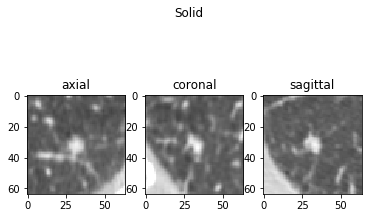

(64, 64) axial shape


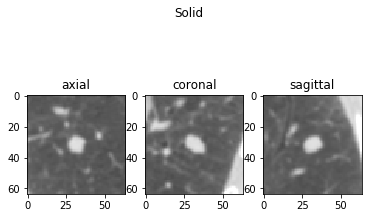

(64, 64) axial shape


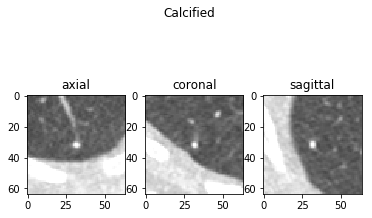

(64, 64) axial shape


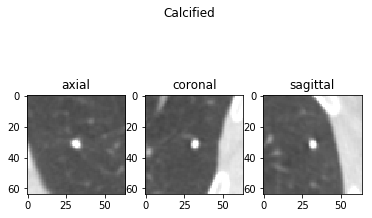

(64, 64) axial shape


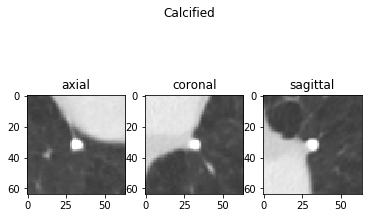

(64, 64) axial shape


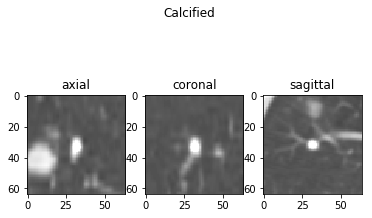

(64, 64) axial shape


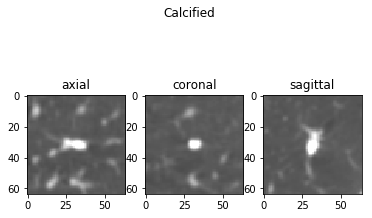

(64, 64) axial shape


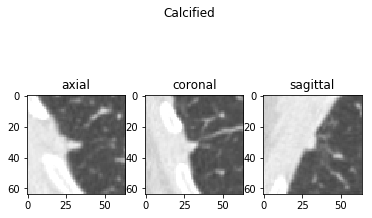

(64, 64) axial shape


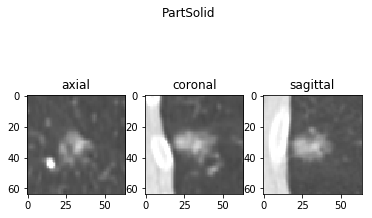

(64, 64) axial shape


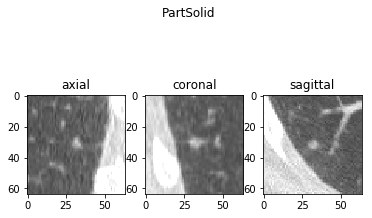

(64, 64) axial shape


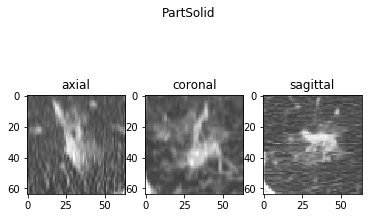

(64, 64) axial shape


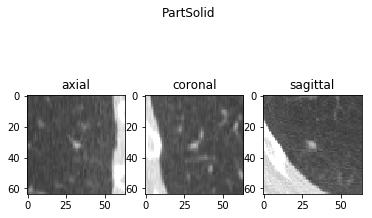

(64, 64) axial shape


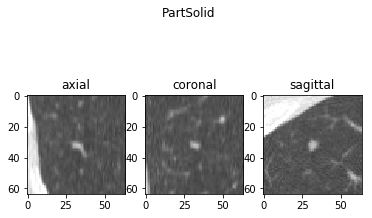

(64, 64) axial shape


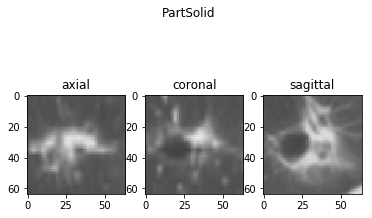

(64, 64) axial shape


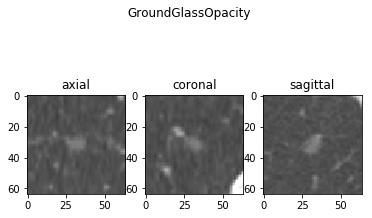

(64, 64) axial shape


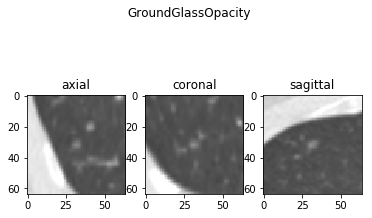

(64, 64) axial shape


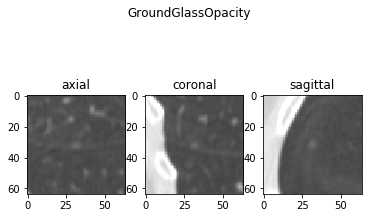

(64, 64) axial shape


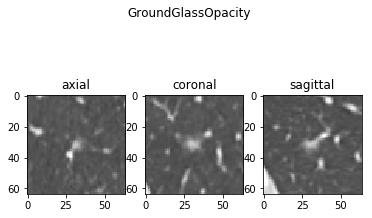

(64, 64) axial shape


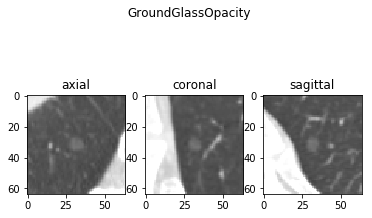

(64, 64) axial shape


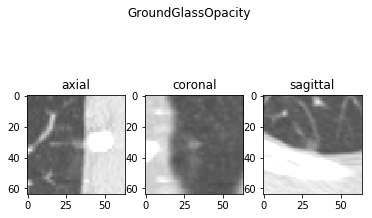

(64, 64) axial shape


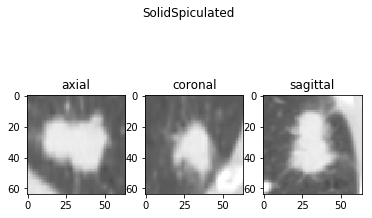

(64, 64) axial shape


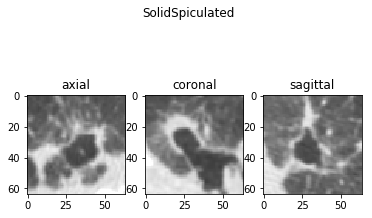

(64, 64) axial shape


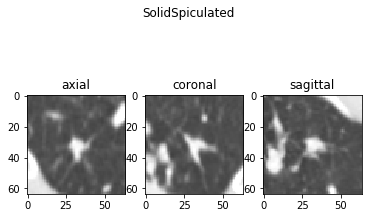

(64, 64) axial shape


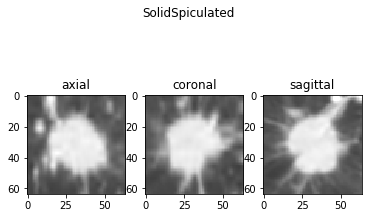

(64, 64) axial shape


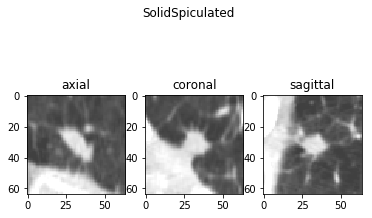

(64, 64) axial shape


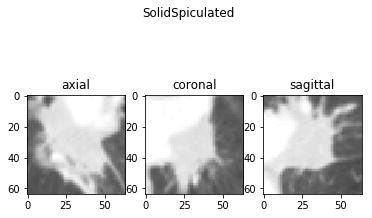

Size of our cubes (64, 64, 64)


In [9]:
src_dir = os.path.join(data_dir, "training", "nodules")
for noduleType in (noduleTypes):
    nodules_dir = os.path.join(src_dir, noduleType)
    npzs = get_file_list(nodules_dir, 'npz')
    
    ## Own implementation
    for idx1, f in enumerate(range(len(npzs[0]))):
        if idx1 > 5:
            break
        file_path = npzs[0][f]
        filename = npzs[1][f]
        # axes are oriented as (z, x, y)
        npz = np.load(file_path)
        axial, coronal, sagittal = get_ortogonal_patches(npz['data'])
        print(sagittal.shape,'axial shape')
        plt.suptitle(noduleType)
        plt.subplot(1,3,1)
        plt.imshow(axial   , cmap='gray', vmin=-600-800, vmax=-600+800); plt.title('axial')
        plt.subplot(1,3,2)
        plt.imshow(coronal , cmap='gray', vmin=-600-800, vmax=-600+800); plt.title('coronal')
        plt.subplot(1,3,3)
        plt.imshow(sagittal, cmap='gray', vmin=-600-800, vmax=-600+800); plt.title('sagittal')
        plt.show()
        
shape_cube = npz['data'].shape
print ('Size of our cubes',shape_cube)

#### Question
The quality of patches looks better in the axial view than in the coronal and sagittal view. Why do you think we get this difference?

*Your answer here.*

### Load datasets
Here we are going to load the pre-extracted feature vector of 256 features per sample.

In [10]:
# load training data (given features)
npz = np.load(os.path.join(data_dir, 'training', 'training_set.npz'))
x = npz['x']
y = npz['y']
print (x.shape)
print (y.shape)

(1795, 256)
(1795,)


In [11]:
# load test data (given features)
npz = np.load(os.path.join(data_dir, 'test', 'test_set.npz') )
x_test = npz['x']
nodule_ids_test = npz['nodule_ids']
print (x_test.shape)

(243, 256)


As we learned last week, it is always good to pre-process our data to have zero mean and unit standard deviation.

In [12]:
# normalize training data
x_mean = np.mean(x, axis=0)
x_std  = np.std(x, axis=0)
x_norm = (x - x_mean)/x_std

In [13]:
# normalize test data
x_mean = np.mean(x_test, axis=0)
x_std  = np.std(x_test, axis=0)
x_test = (x_test - x_mean)/x_std

### Training and validation sets

The dataset we are given does not explicitly provide a validation set.
Therefore, we will have to define one, and consequently update the training set (remove samples used for validation, why?).

In the following cell, you will implement a function that derives a validation set and a new training set from a given (original) training set. You will use this function to define the subsets that you will be using during training.
The function should derive the amount of samples it should take for the validation set from your dataset. Then, sample an equal amount of samples for each class from your dataset. As we don't want any unneccesarry copies of our data, we want to extract the data directly from the input using the indexes. 

In [14]:
# function to split training set into training and validation subsets

def split_training_validation_datasets(x, y, val_percentage=0.3, val_balanced=True):
    """
    Derive a training and a validation datasets from a given dataset with
    data (x) and labels (y). By default, the validation set is 30% of the
    training set, and it has balanced samples across classes. When balancing,
    it takes the 30% of the class with less samples as reference.
    """    
    # define number of samples
    n_samples = x.shape[0]
    
    # make array of indexes of all samples [0, ..., n_samples -1]
    idxs = np.array(range(n_samples))
    
    print("Dataset has " + str(n_samples) + " samples")
    print("Training set should have {} samples".format(str(int(n_samples * (1 - val_percentage)))))
    print("Validation set should have "  + str(int(n_samples * val_percentage)) + " samples")
    
    # initialize (empty) lists of samples that will be part of training and validation sets 
    tra_idxs = []
    val_idxs = []
    
    # append values to tra_idxs and val_idxs by adding the index of training and validation samples
    # take into account the input parameters 'val_percentage' and 'val_balanced'

    ### YOUR CODE HERE ###
    # create_train_test_split people... it exists...  
    
    if val_balanced:
        # Get label with least amount of examples, and multiply by val_percentage, then make integer
        subsample_size = int(np.min(np.unique(y,return_counts = True)[1]) * val_percentage)
        # sample all of the remaining classes for the validation set, taking into account class balance
        for label in np.unique(y):
            # Grab indices that have label value temp
            temp = idxs[y == label]
            # append to val_idxs, sample from temp, and account for subsample_size
            # draw without replacement, or else it would not be a split, no copies of data in validation set!
            val_idxs.append(np.random.choice(temp, size=subsample_size, replace=False))
            
        # According to the assignment, we should take the validation set as a reference
        # with the class that has the least examples, when balancing.
        # This means that in reality, the 30% is taken over the class with the least amount of labels
        # and not 30% of the entire dataset 
        val_idxs = np.asarray(val_idxs).flatten()
        tra_idxs = np.setdiff1d(idxs, val_idxs)  
    else:
        # do not take into account class imbalance, and take a random sample of the data
        val_idxs = np.random.choice(idxs, size = int(n_samples * val_percentage), replace=False)
        tra_idxs = np.setdiff1d(idxs, val_idxs)
    
    # print number of samples in training and validation sets
    print('validation samples = {}'.format(len(val_idxs)))
    print('training samples   = {}'.format(len(tra_idxs)))
        
    # define training/validation data and labels as subsets of x and y
    x_train = x[tra_idxs]
    y_train = y[tra_idxs]
    x_validation = x[val_idxs]
    y_validation = y[val_idxs]
    
    return x_train, y_train, x_validation, y_validation

In [15]:
# split dataset

# I REMOVED AN EXTRA ARGUMENT IN split_training_validation_datasets(x_norm,y,n_classes) -> n_classes = 5 and is gives as val_percentage
# that's not logical...
x_train, y_train, x_validation, y_validation = split_training_validation_datasets(x_norm, y, val_balanced=True)
print(y_train)
print(y_validation)

Dataset has 1795 samples
Training set should have 1256 samples
Validation set should have 538 samples
validation samples = 90
training samples   = 1705
[0. 0. 0. ... 4. 4. 4.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


**Shuffle your training set!** This is necessary when we want to train a neural network using stochastic (mini-batch) gradient descent.

In [16]:
indx=list(range(x_train.shape[0]))
print (y_train)
np.random.shuffle(indx)
x_train = x_train[indx]
y_train = y_train[indx]
print (y_train)

[0. 0. 0. ... 4. 4. 4.]
[0. 1. 0. ... 0. 0. 0.]


#### Question
Why do you think it is important to shuffle the dataset?

*Your answer here.* 

Some jibberish I wrote down...
I think this is because of the mini batches in neural network backpropagation only. 
If mini batches exist solely out of ordered samples (by their class), then you can have bad batches, and the overall gradient can be bad. You want each batch to be a representative sample of the global distribution, meaning it has datapoints with all classes, and within the classes it also needs to have a diverse ange of values.

In traditional optimization, i.e. svm or linear regression, shuffling does not matter.

### kNN classifier

Now that we have defined a training and a validation set, we can define a baseline result by applying kNN classifier (which we have seen in previous assignments), and compute the accuracy on the validation set. If you have made a balanced validation set, accuracy is a good evaluation metric.

In [17]:
# kNN
classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=30)
classifier.fit(x_train, y_train)
y_validation_auto = classifier.predict(x_validation)

Compute the confusion matrix for the results with kNN classifier. In order to compute the **confusion matrix** and the **accuracy**, you can use functions from the [sklearn library](http://scikit-learn.org/stable/documentation.html):

* ```sklearn.metrics.confusion_matrix()```
* ```sklearn.metrics.accuracy_score()```

In [18]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
conf_mat_knn = confusion_matrix(y_validation, y_validation_auto)

print("Confusion matrix using kNN:")
print(conf_mat_knn)

# accuracy
acc_knn = accuracy_score(y_validation, y_validation_auto)


print ('Accuracy using kNN: {:.2f}%'.format(100.0*acc_knn))

Confusion matrix using kNN:
[[18  0  0  0  0]
 [ 7 11  0  0  0]
 [16  0  0  2  0]
 [10  0  0  8  0]
 [17  0  0  1  0]]
Accuracy using kNN: 41.11%


You can use the following convenience function to visualize the confusion matrix

In [19]:
def plot_confusion_matrix(conf_mat, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    """
    plt.imshow(conf_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    thresh = conf_mat.max() / 2.
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
        plt.text(j, i, conf_mat[i, j], horizontalalignment="center",
                 color="white" if conf_mat[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

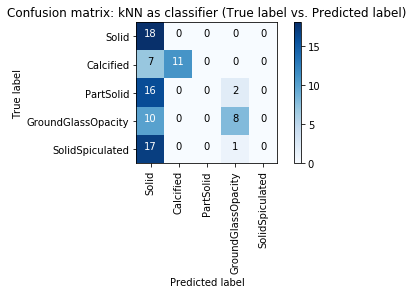

In [20]:
# visualize the confusion matrix
plot_confusion_matrix(conf_mat_knn, classes=noduleTypes,
                      title='Confusion matrix: kNN as classifier (True label vs. Predicted label)')

#### Question
The confusion matrix highlights a problem of the kNN classifier as it is used now. Can you find it and explain why?

*Your answer here.*

# Classification with Neural Networks
Now that some kind of baseline result has been obtained with kNN, we can start developing a classifier based on neural networks.
For this purpose, we will use the **Keras** and the **TensorFlow** library, which implements classes and functions that make building and training neural networks easy.
Keras and TensorFlow use a bit of a special Python library, because it is based on symbolic representation of variables, which you may not be familiar with.
For this reason, before we delve into the implementation of our neural network, we propose a short introduction to Keras and TensorFlow, which will clarify some of the doubts and questions you may have about these libraries.

### Keras / TensorFlow (short) introduction
Keras is a Python library that lets you to define, optimize, and evaluate mathematical expressions, especially ones with multi-dimensional arrays (```numpy.ndarray```).

Keras is not a programming language in the normal sense because you write a program in Python that builds expressions for TensorFlow. Still it is like a programming language in the sense that you have to
*	declare variables and give their types
*	build expressions for how to put those variables together
*	compile expression graphs to functions in order to use them for computation.

More about Keras: https://keras.io/

TensorFlow is the backend used by Keras.

More about TensorFlow: https://www.tensorflow.org/api_docs/


## Building a two-layer Neural Network to classify nodule features

<img src="./figures/learning_framework.png" alt="Learning framework" align="right" width="350">

In this first part of the assignment, we are going to build a neural network with one hidden layer in Keras. For this particular assignment we are going to use the fully connected layers, also called Dense layers in Keras (visit the following link to get more details of default parameters https://keras.io/layers/core/#dense).

As we have seen in the lecture this week, in order to build our classification framework with neural networks, we have to define and specify parameters for three main components:

1. NETWORK ARCHITECTURE
2. LOSS FUNCTION
3. OPTIMIZATION ALGORITHM

### Creating the neural network

We will build this first network to have **one hidden layer of 10 neurons**.
Later, we will experiment with a different number of neurons, hidden layers, but let's start with this one.

Keep in mind that the size of the input and of the output layer of your network are given by the data and the classification problem you have to solve.
Therefore, before you start building the network, it is good to check again the dimensionality of data.

In [23]:
data_size = x_train.shape
n_classes = len(noduleTypes)
print (data_size)
print (n_classes)

1705
5


Define the architecture of a neural network with one hidden layer of 10 neurons.
In your implementation, consider what follows:

* Keras has two ways of defining network models, the **sequential** model and the **Model class**. These models are documented at this page: https://keras.io/models/about-keras-models/.

* In this assignment, we will use a ```Sequential``` model, which can be seen as a **linear stack** of layers. This makes building a network easy, because you can simply initialize a model as ```Sequential```, and then add layers using the method ```add()```. You can find information about this at this link: https://keras.io/getting-started/sequential-model-guide/.

* You can define your network model variable as ```network```, and return it as output of the function ```build_neural_network()```.

* Use sigmoid linearity for the hidden layer (later in this assignment you will also be allowed to use ReLU!). In Keras, non linearities belong to the class ```Activation```.

* Use softmax function as output of the network (also belong to the class ```Activation```)

* Use a proper strategy to initialize the parameters of the network

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation

# define neural network with 1 hidden layer of 10 neurons
def build_neural_network(data_size, n_classes):

    ### YOUR CODE HERE ###
    # empty sequence of layers
    network = Sequential()
    # input dimensionality: number of columns in data matrix
    network.add(Dense(10,input_dim=data_size[1]))
    network.add(Activation('sigmoid'))
    # add the output layer
    network.add(Dense(n_classes))
    # add softmax
    network.add(Activation('softmax'))
    return network

Now, you can use the function that you have just coded to build your neural network:

In [61]:
# build neural network object
network=build_neural_network(data_size, n_classes)

You are still not ready to use it, first you have to compile it, and in order to do that, you have to specify a couple of other parameters.

## Loss function & Optimization Algorithm

Now that the architecture is defined, we have to specify the two other components of our learning framework, namely the loss function and the optimization algorithm.

Once you have defined these two components, you will have to **compile** the network that you have defined with the function ```build_neural_network```, using the function ```network.compile()```.

The ```network.compile()``` function requires the following input parameters:
1. loss function -> the loss function
2. optimizer -> the optimization algorithm
3. metrics -> the performance parameters you want to compute

You can find information about how to use the ```compile()``` function at this page: https://keras.io/getting-started/sequential-model-guide/.

### Loss
We have to define a function that, given the network, gets the predicted probability for a given input sample.
Since we are dealing with a multi-class classification problem, **categorical cross-entropy** seems a reasonable choice.

### Optimization algorithm
We also have to specify how we want to train our model. In our case, we will use "Stochastic Gradient Descent". As we have seen in the lecture this week, gradient descent algorithms need a **learning rate**, which indicates how much we step in the (opposite) direction of the gradient. We have also seen that strategy to adapt the learning rate during training are possible, but for the moment we just define a fixed learning rate. Pick a value and see what happens, you can optimize this later.

### Metrics
Since we are developing a classifier for a multi-class problem, the accuracy seems like a reasonable choice.

In the end, you need to compile your network with your settings.

In [76]:
### Replace None with your code ###
from keras import optimizers

loss = 'categorical_crossentropy' # define the (string) loss function
learning_rate = 0.05 # pick a value for your learning rate
sgd = optimizers.SGD(lr=learning_rate) # define Stochastic Gradient Descent as the keras optimizer, which takes the learning rate as input parameter
metrics = ['accuracy'] # define (Python) list of metrics

Now you are ready to compile your network!

In [77]:
network.compile(loss=loss, optimizer=sgd, metrics=metrics)

If we are using categorical cross-entropy as loss function, we need a representation of labels in the training (and later validation) data in a 'one-hot' form. This means that if we have 5 classes, the format of labels has to be the following:

* ```y_train = 1 -> [1, 0, 0, 0, 0]```
* ```y_train = 2 -> [0, 1, 0, 0, 0]```
* ```y_train = 3 -> [0, 0, 1, 0, 0]```
* ```y_train = 4 -> [0, 0, 0, 1, 0]```
* ```y_train = 5 -> [0, 0, 0, 0, 1]```

Lucky for you, Keras has implemented such a [function](https://keras.io/utils/#to_categorical). We can use that to convert the given format into a 'one-hot' format. First, check the format of labels in your dataset, then check if the function of Keras does what it is supposed to do.

In [78]:
### Replace None with your code ###

y_train_one_hot = keras.utils.to_categorical(y_train)

y_validation_one_hot = keras.utils.to_categorical(y_validation) 

# check number of samples per class
print (np.sum(y_train_one_hot, axis=0))
print (np.sum(y_validation_one_hot, axis=0))

[1268.  175.   44.  156.   62.]
[18. 18. 18. 18. 18.]


### Check validation performance before training
All the main components required to train our network have been defined now.
However, we have seen that in order to properly monitor the behaviour of a network during training, we should check the performance (the accuracy) on a separate validation set, and see if it returns something sensible.
For this purpose, you can use the function ```network.evaluate``` in Keras, and set the ```batch_size``` to 1, for example.

In [79]:
scores=network.evaluate(x_validation, y_validation_one_hot, batch_size=1)
val_loss=scores[0]
val_acc=scores[1]
print ('Initial validation accuracy = {:.2f}%'.format(100.*val_acc))

90/90 [==============================] - 0s 4ms/step
Initial validation accuracy = 41.11%


### Learning procedure
Now we can write the learning algorithm, as we have seen in the lecture this week.
Basically, we will iteratively update the parameters of our network by extracting mini-batches from the training set, until all the training samples have been used. After a complete round, one epoch is done. We repeat this procedure for a number of epochs that you define.
During the training loop, we also want to check the performance of the trained network on the validation set.
Therefore, for each epoch, after a training pass, we also classify the validation set.

We provide the main structure of the learning script, implement the missing parts:

* Train the network
* Get the training loss and accuracy
* Validate your network on the validation data
* Get the validation loss and accuracy

During training, we will also be saving to disk the parameters of the network wich has the best performance on the validation set. This will be stored as the file ```best_model.h5``` in the direcotry ```network_dir```, which by default is the root directory of this notebook.

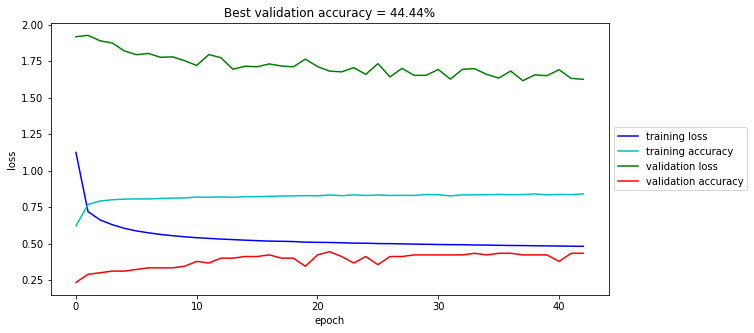

76/90 [========================>.....] - ETA: 0s

KeyboardInterrupt: 

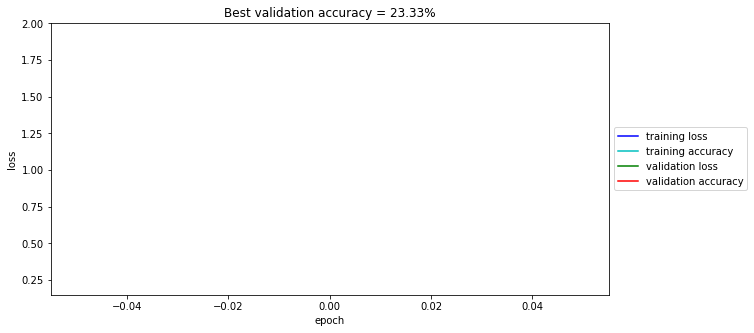

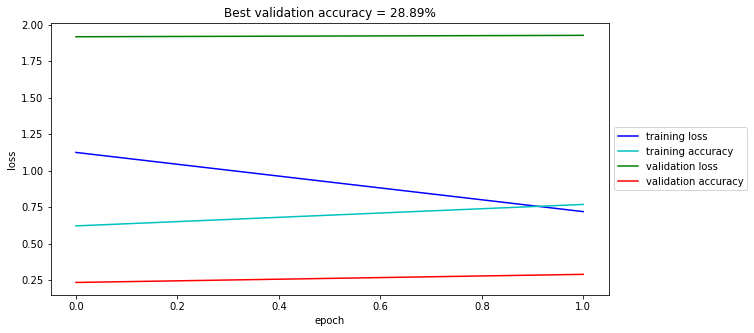

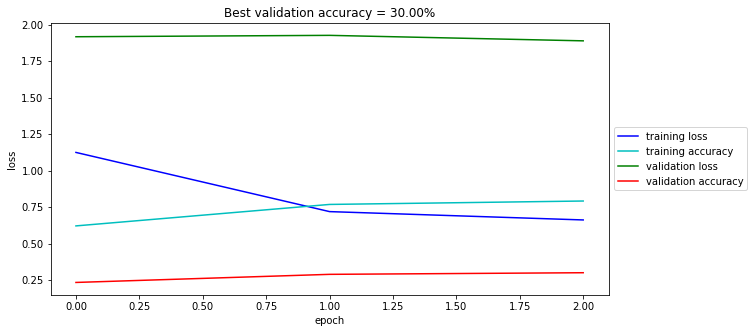

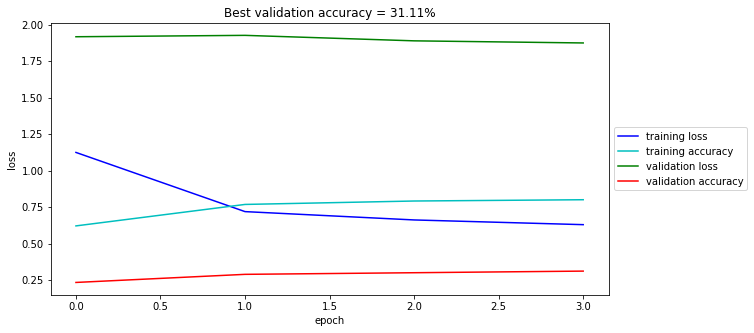

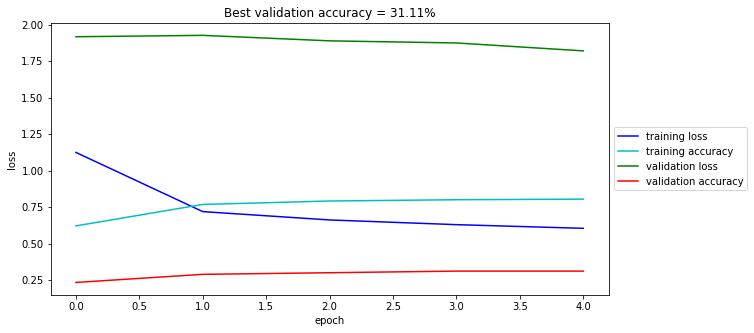

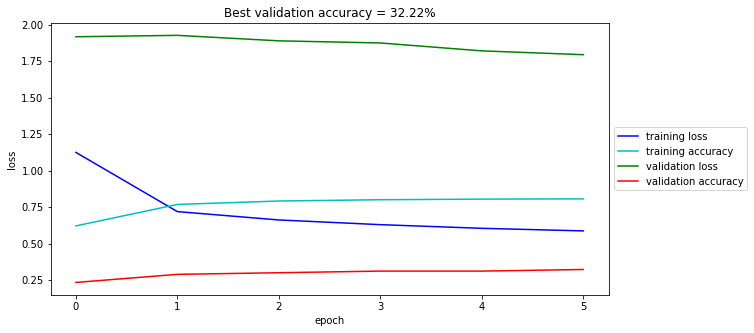

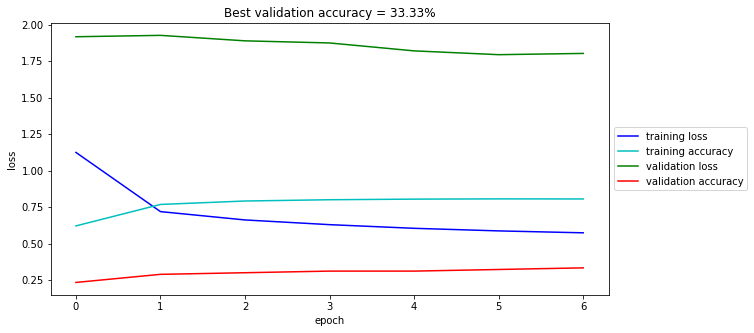

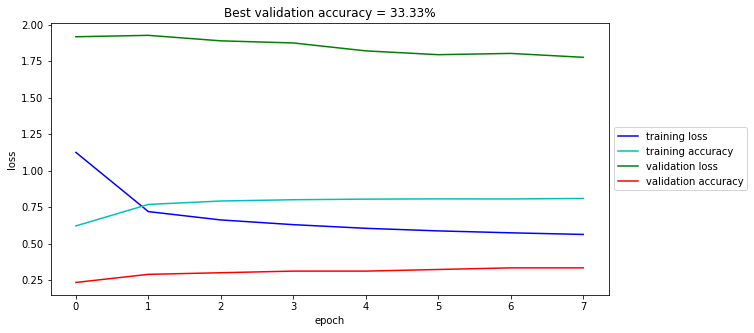

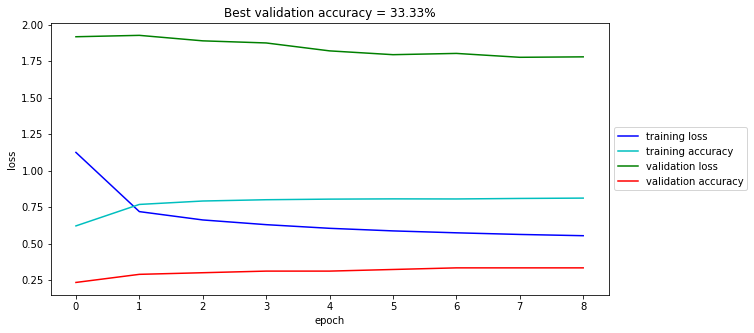

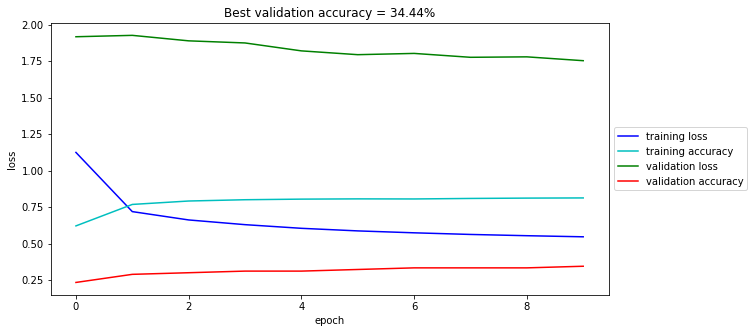

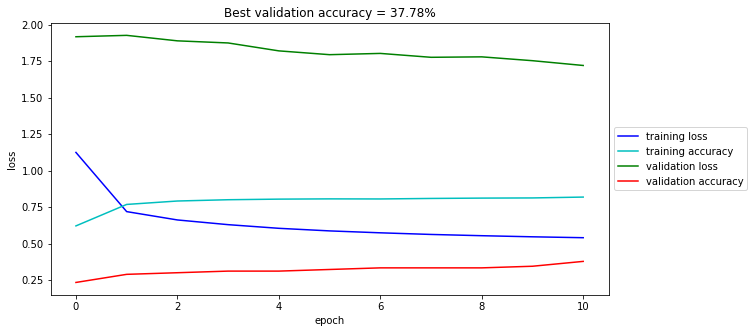

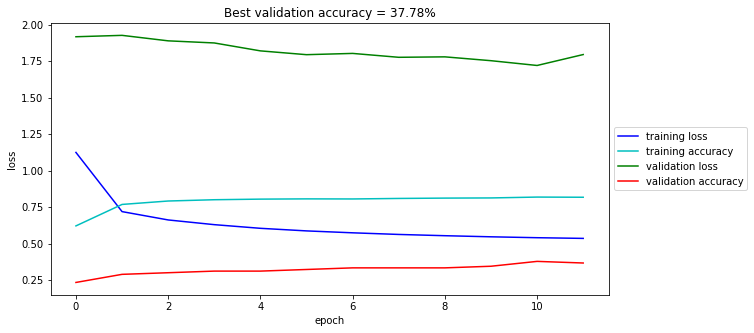

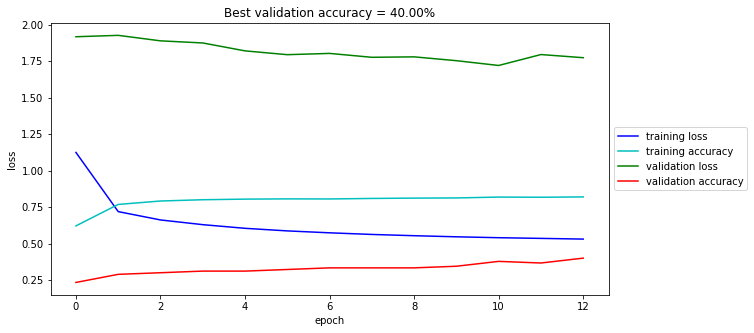

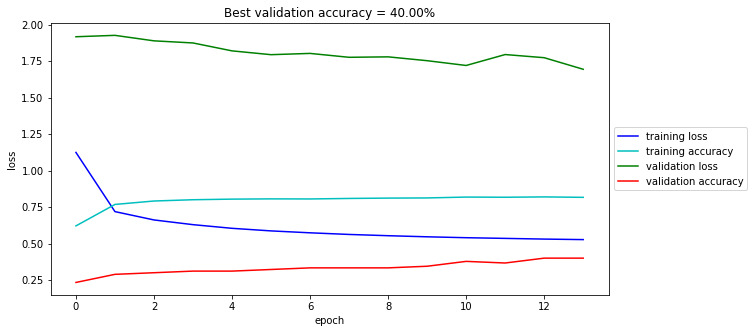

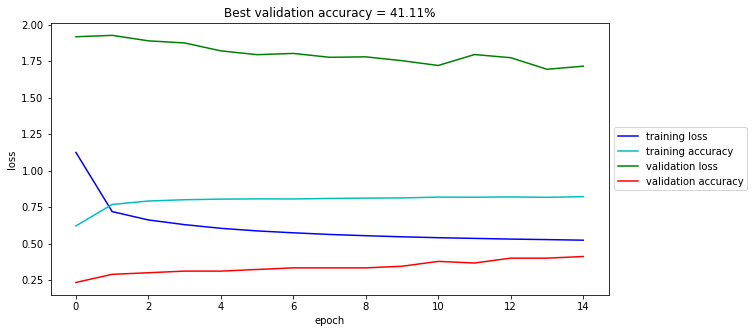

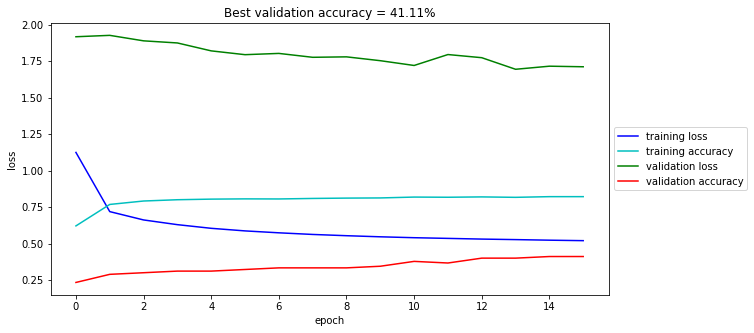

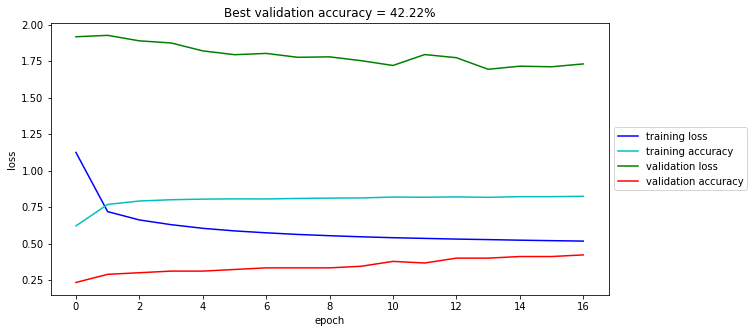

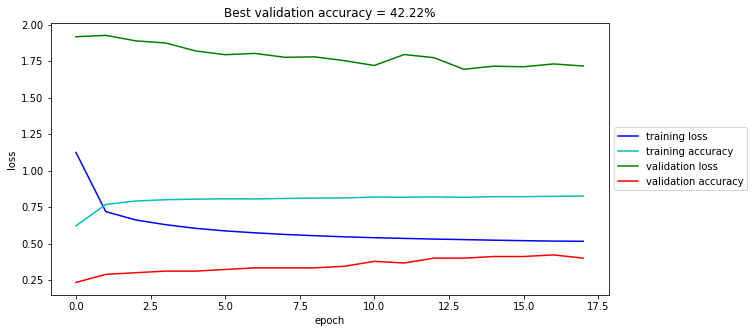

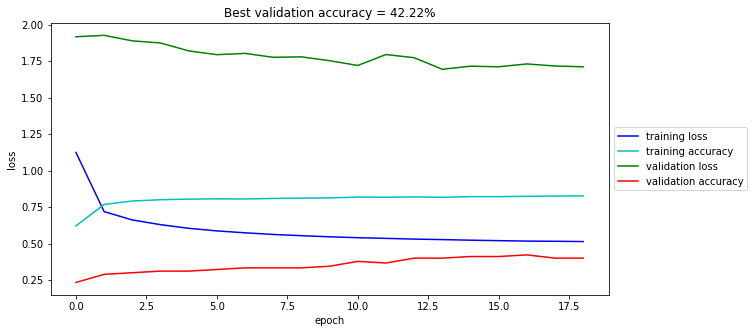

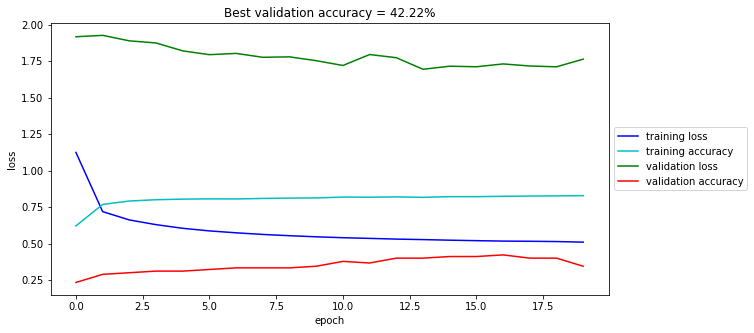

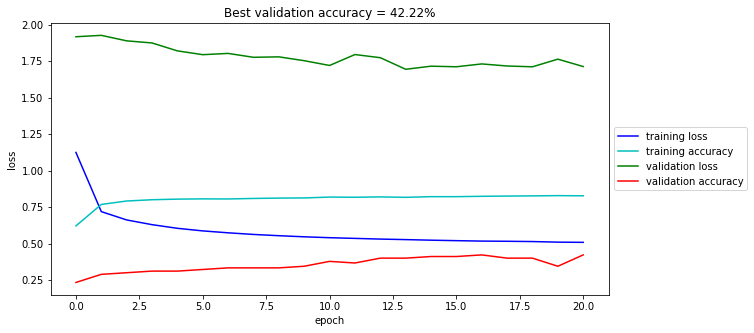

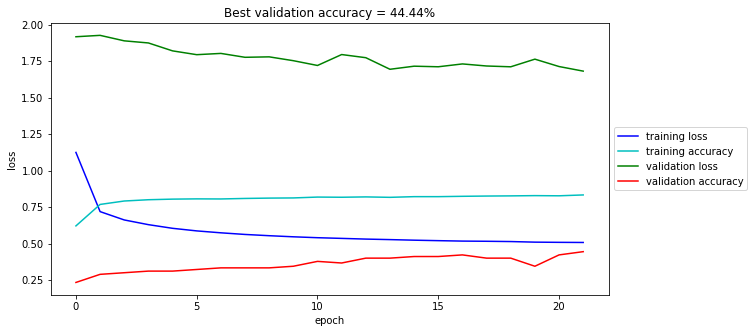

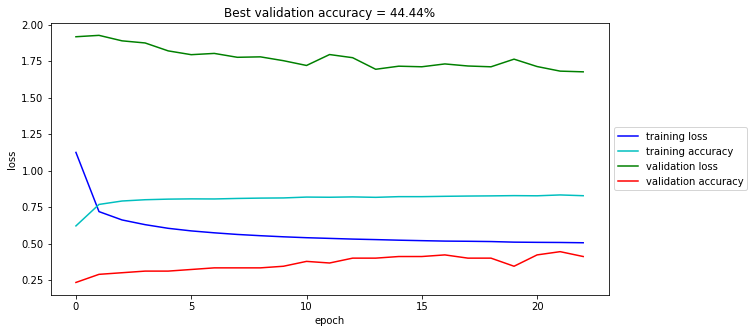

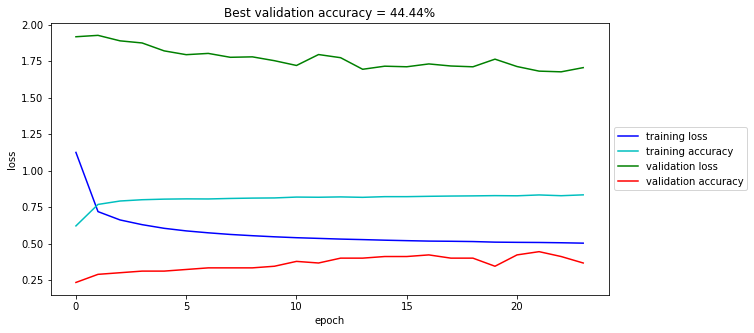

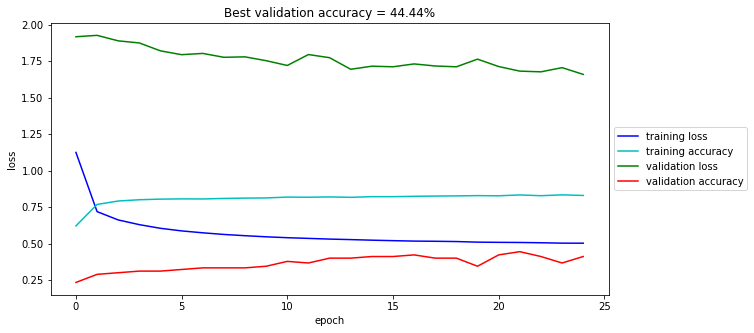

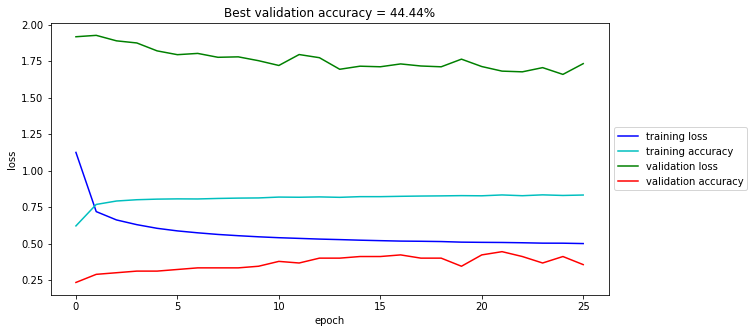

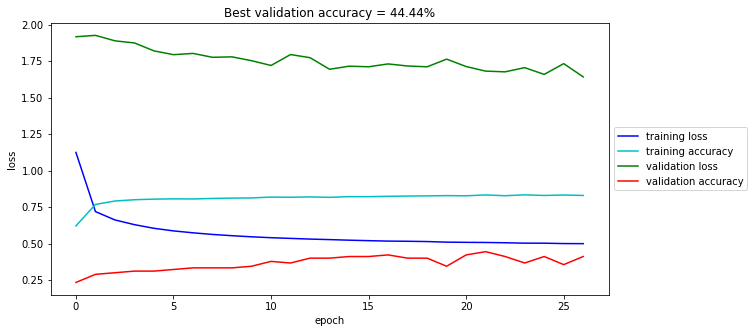

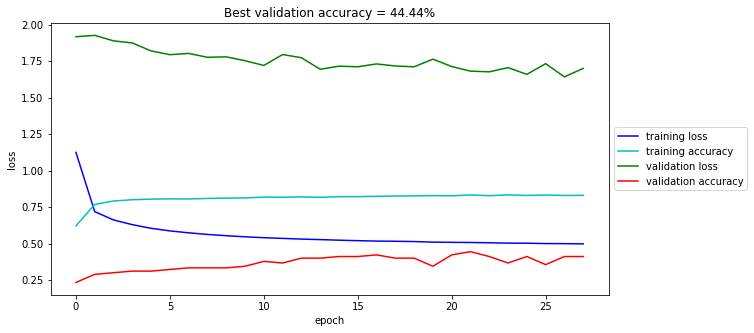

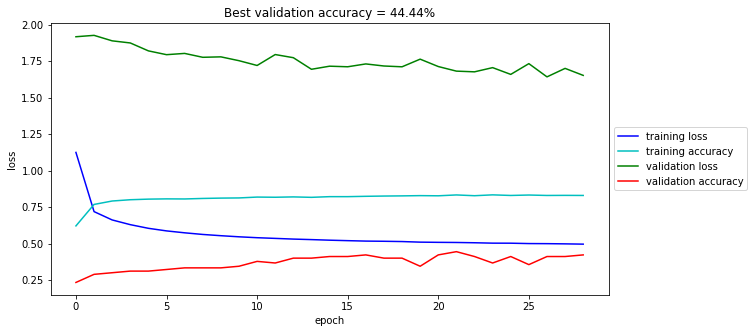

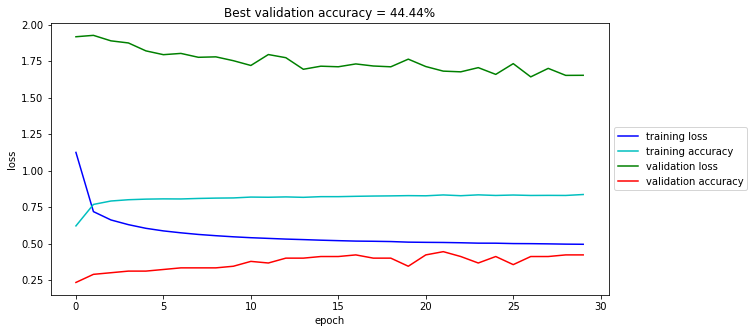

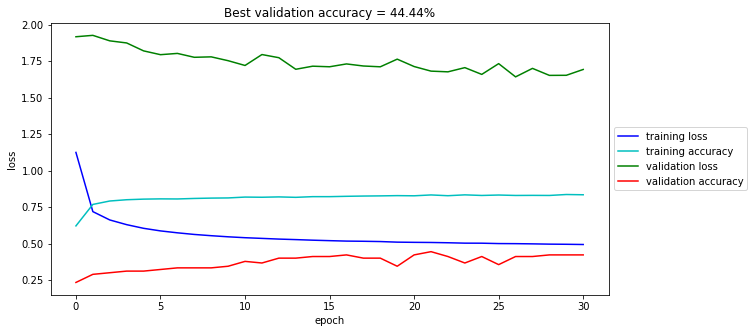

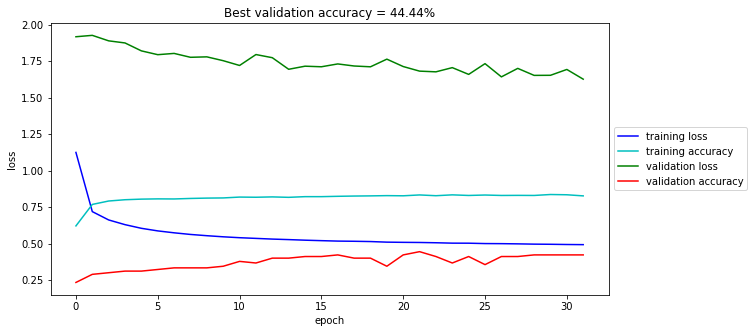

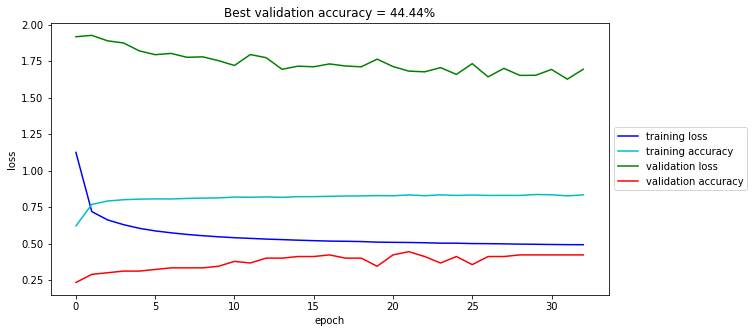

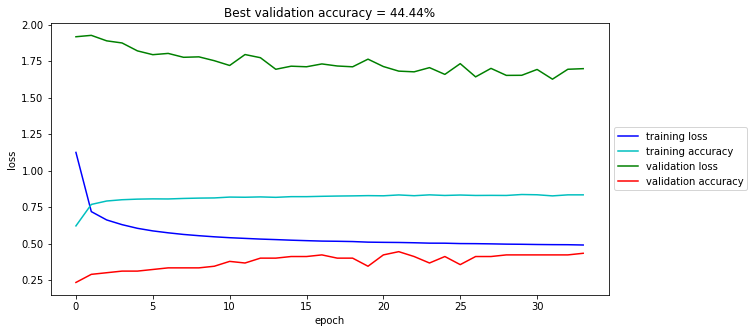

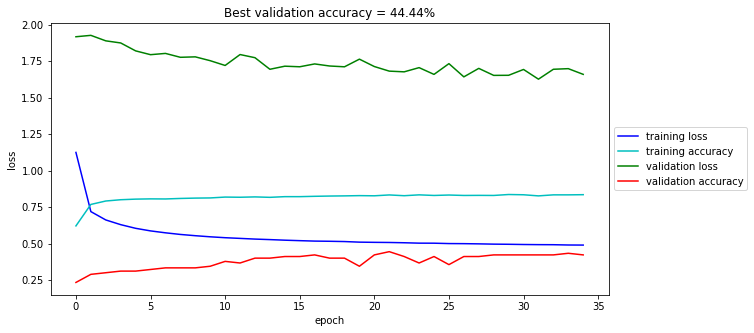

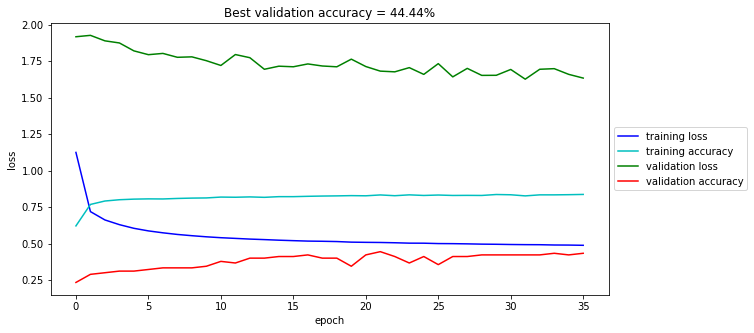

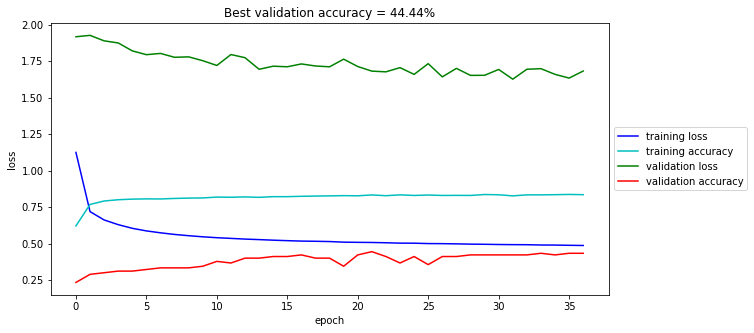

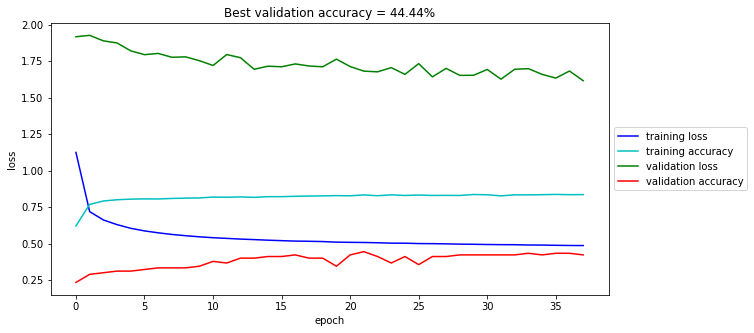

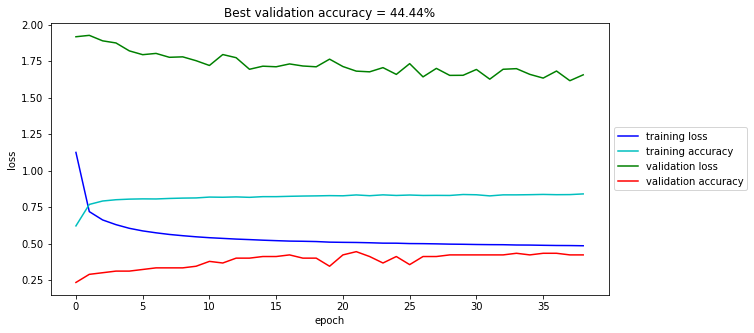

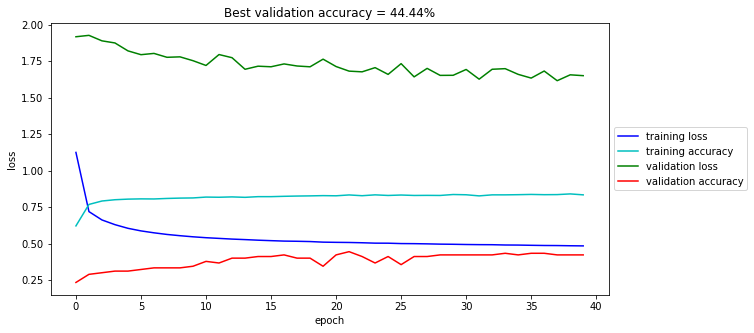

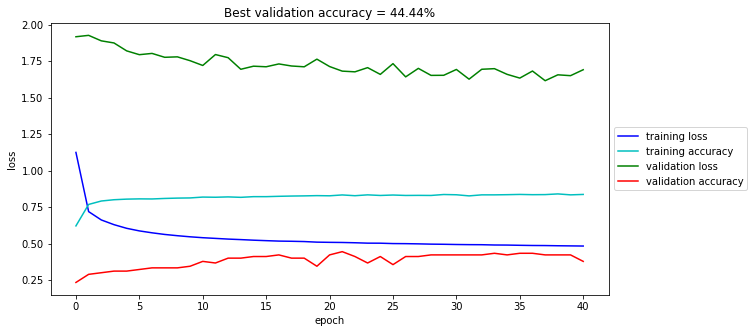

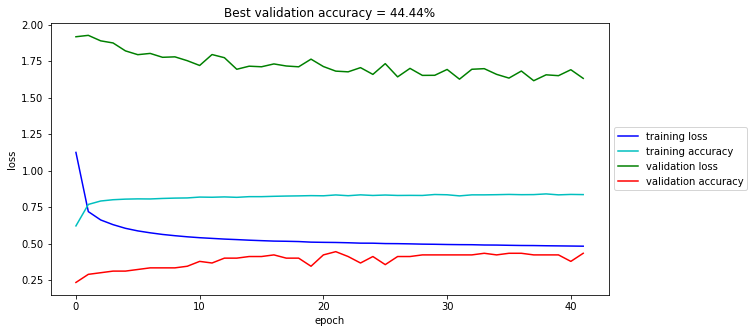

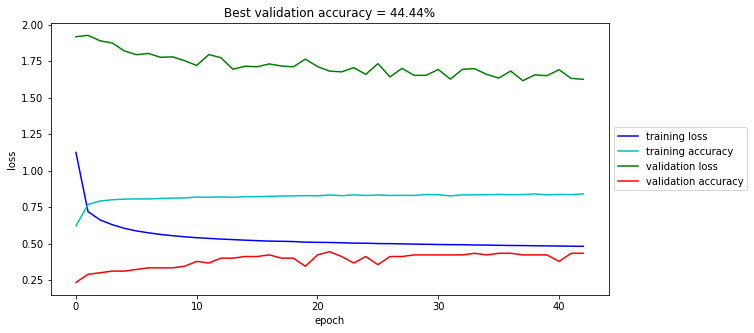

In [67]:
### Replace None with your code ###
# TODO optimize
n_epoch = 400
batch_size = 32

network_filepath = os.path.join(network_dir, 'best_model.h5')

# lists where we will be storing values during training, for visualization purposes
tra_losses = [] # list for training loss
tra_accs = [] # list for training accuracy
val_losses = [] # list for validation loss
val_accs = [] # list for validation accuracy

# we want to save the parameters that give the best performance on the validation set
# therefore, we store the best validation accuracy, and save the parameters to disk
best_validation_accuracy = 0 # best validation accuracy

for epoch in range(n_epoch):
    st = time.time()
    
    # Train your network
    results = network.fit(x=x_train, y=y_train_one_hot, batch_size=batch_size, verbose=0)
    
    # Get training loss and accuracy
    training_loss = results.history['loss']
    training_accuracy = results.history['acc']
    
    # Add to list
    tra_losses.append(training_loss)
    tra_accs.append(training_accuracy)
    
    # Evaluate performance (loss and accuracy) on validation set
    scores = network.evaluate(x_validation, y_validation_one_hot, batch_size=1)
    validation_loss = scores[0]
    validation_accuracy = scores[1]
    
    # Add to list
    val_losses.append(validation_loss)
    val_accs.append(validation_accuracy)
    
    # (Possibly) update best validation accuracy and save the network
    if validation_accuracy > best_validation_accuracy:
        best_validation_accuracy = validation_accuracy
        network.save(network_filepath)
    
    # Visualization of the learning curves
    fig = plt.figure(figsize=(10, 5))
    tra_loss_plt, = plt.plot(range(len(tra_losses)), tra_losses, 'b')
    tra_accs_plt, = plt.plot(range(len(tra_accs)), tra_accs, 'c')
    val_loss_plt, = plt.plot(range(len(val_losses)), val_losses, 'g')
    val_acc_plt, = plt.plot(range(len(val_accs)), val_accs, 'r')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend([tra_loss_plt, tra_accs_plt, val_loss_plt, val_acc_plt], 
              ['training loss', 'training accuracy', 'validation loss', 'validation accuracy'],
              loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Best validation accuracy = {:.2f}%'.format(100. * best_validation_accuracy))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.2)

## Classification: validation set
Now we can use the trained network to classify the validation set (again), and check that the performance corresponds to the best value obtained during training. We can compute the accuracy and also visualize the confusion matrix, to get a feeling how well we are doing.

Accuracy on validation set: 44.44%


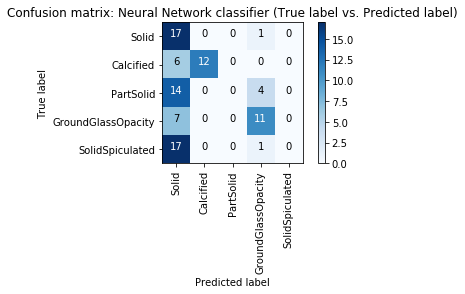

In [72]:
# Re-load the model found for the best accuracy
# the function 'load_model' takes care of compiling again the function 
best_network = keras.models.load_model(network_filepath)

# Calculate the prediction on the validation set using the best network
# these predictions are one-hot encoded, so argmax them to get back to classes
prediction = best_network.predict(x_validation)
y_validation_auto = np.argmax(prediction,axis=1)
# Assess the confusion matrix to check if the performances corresponds to the best value obtained during the training
conf_mat_nn = confusion_matrix(y_validation, y_validation_auto) 
acc_nn = accuracy_score(y_validation, y_validation_auto)
print('Accuracy on validation set: {:.2f}%'.format(100. * acc_nn))
plot_confusion_matrix(conf_mat_nn, classes=noduleTypes,
                      title='Confusion matrix: Neural Network classifier (True label vs. Predicted label)')

Use the labels in the validation set to identify the cases that you are misclassifying, and see what the network says about those cases. Since the labels in our dataset are given by humans (no ground truth available, only reference standard), there can be some confusion in the way nodules are classified, even in the reference standard.

#### Question
Based on what you have learned about the appearnce of nodules at the beginning of this notebook, do you think you agree with the labels predicted by your network? 

*Your answer here.*

## Classification: test set
Now we can repeat the classification step on the test set, and submit the results to grand-challenge.org. During the test procedure, we will save the predictions in a csv file, which you can submit.
Please note that the reference standard in grand-challenge has labels y = [1, ..., 5]. Take this into account when making the csv file for your submission.

In [ ]:
# Classify the test set

# Create a .csv file for saving the results of the classification
h_csv = open('./results.csv', 'w')
h_csv.write('nodule_id,label\n')

# For each samples within the test set, get the prediction from the network and save it 
n_test_samples = x_test.shape[0]
for n in range (n_test_samples):
    
    # get one test sample
    test_sample = x_test[n,:].reshape(1,256).astype(np.float32)
    
    # get its nodule is
    nodule_id = nodule_ids_test[n]
    
    # make prediction using neural network
    prediction = best_network.predict(test_samples)
    
    # convert prediction into a label
    y = np.argmax(None) # <--- replace None with your code!
    
    # write the label to file
    h_csv.write('{},{}\n'.format(nodule_id.decode('UTF-8'), y+1))

    # close file
    h_csv.close()

## Submit your results!

You can now download the results file with this link: [results.csv](results.csv).  
Next, upload your result to the challenge website (https://ismi-nodules.grand-challenge.org/) and see how well you performed compared to your fellow students! You can submit as often as you want, only the best result counts.  

# Task 2: Improve your neural network
So far, we have implemented a simple network with one hidden layer, 10 neurons and sigmoid activation function.
We also used a constant learning rate.
This means that there is plenty of room for improvement!
You can, for example:
* change the architecture of your network, add neurons, add layers
* change the activation function, try ReLU and see what happens
* change the learning rate, or try to find a strategy to adapt it during training

In order to fine-tune these parameters, you may want to expand the main script used for training and validation to include a search for the optimal set of hyper-parameters (for example, cross-validation).
For each experiment:
* provide a clear description of the setup (value, range of parameters used in the search), which we can read and understand
* save the trained network, which you can load later

In particular, show and explain:
* how the results change by changing the learning parameters/architecture of the network
* how the learning rate worked and how it affected the performance of the neural network

Note that hyper-parameters tuning has to be done using the **validation** set.
When you are happy with the performance on the vaidation set, you can submit the results to grand-challenge!

**This may sound like a boring task, but is actually make it takes to make good neural networks!!! Engineers and researchers do this very often!!!**

Do not modify previous cells in this notebook, but please add new cells and copy-paste your code, and modify it here.

In [ ]:
# define improved neural network
def improved_neural_network(data_size, n_classes):
    # Your code here:
    
    return network

In [ ]:
# * Learning-rate
# * Optimizer (SDG)
# * Loss
# * Compile

Train improved network:

In [ ]:
# Your code here:

# Task 3: Train a neural network with raw nodule data
Now that you have developed your supervised learning framework using the features that we provided, repeat the procedure using raw data as input. You can use the functions provided at the beginning of this notebook to extract 2D views from 3D nodules, which could be useful to develop your network.

Once patches have been extracted, you can use a strategy similar to what showed in the lecture this week (when a linear model was used to classify CIFAR10 images) and vectorize patches to obtain feature vectors.

Repeat the training procedure, tune the hyper-parameters, and submit the new results.

## Loading Train Data

In [ ]:
# Define a function that loads and preprocesses the raw data.
# Your code here:


In [ ]:
# Define neural network with raw nodule data
def raw_neural_network(data_size, n_classes):
    # Your code here:

    return network

Write your own training loop:

In [ ]:
# Your code here:

### Teaching Assistants:

Send us an email for questions. Remember to send your assignment before Monday midnight.

- Ecem Lago: ecem.lago@radboudumc.nl
- Thomas De Bel: Thomas.deBel@radboudumc.nl